In [196]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [197]:
%matplotlib inline 

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
iris_df = pd.read_csv('D:/CSVFiles/iris.csv')
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,Iris-setosa
114,115,5.8,2.8,5.1,2.4,Iris-virginica
121,122,5.6,2.8,4.9,2.0,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
7,8,5.0,3.4,1.5,0.2,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [198]:
iris_df.shape

(152, 6)

In [199]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [200]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [201]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median',axis = 0)
imputed_data = imp.fit_transform(iris_df.iloc[:,:-1].values)
iris_df.iloc[:,:-1] = imputed_data

In [202]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null float64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [203]:
iris_df['Species'] = iris_df['Species'].astype('category')
iris_df.dtypes

Id                float64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [204]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
iris_df_numeric = iris_df
iris_df_numeric['Species'] = number.fit_transform(iris_df['Species'].astype('category'))
iris_df_numeric.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,44.0,5.0,3.5,1.6,0.6,0
41,42.0,4.5,2.3,1.3,0.3,0
128,129.0,6.4,2.8,5.6,2.1,2
125,126.0,7.2,3.2,6.0,1.8,2
91,92.0,6.1,3.0,4.6,1.4,1
140,141.0,6.7,3.1,5.6,2.4,2
1,2.0,4.9,3.0,1.4,0.2,0
81,82.0,5.5,2.4,3.7,1.0,1
50,51.0,7.0,3.2,4.7,1.4,1
114,115.0,5.8,2.8,5.1,2.4,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [205]:
iris_df_numeric.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [206]:
iris_df_numeric.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

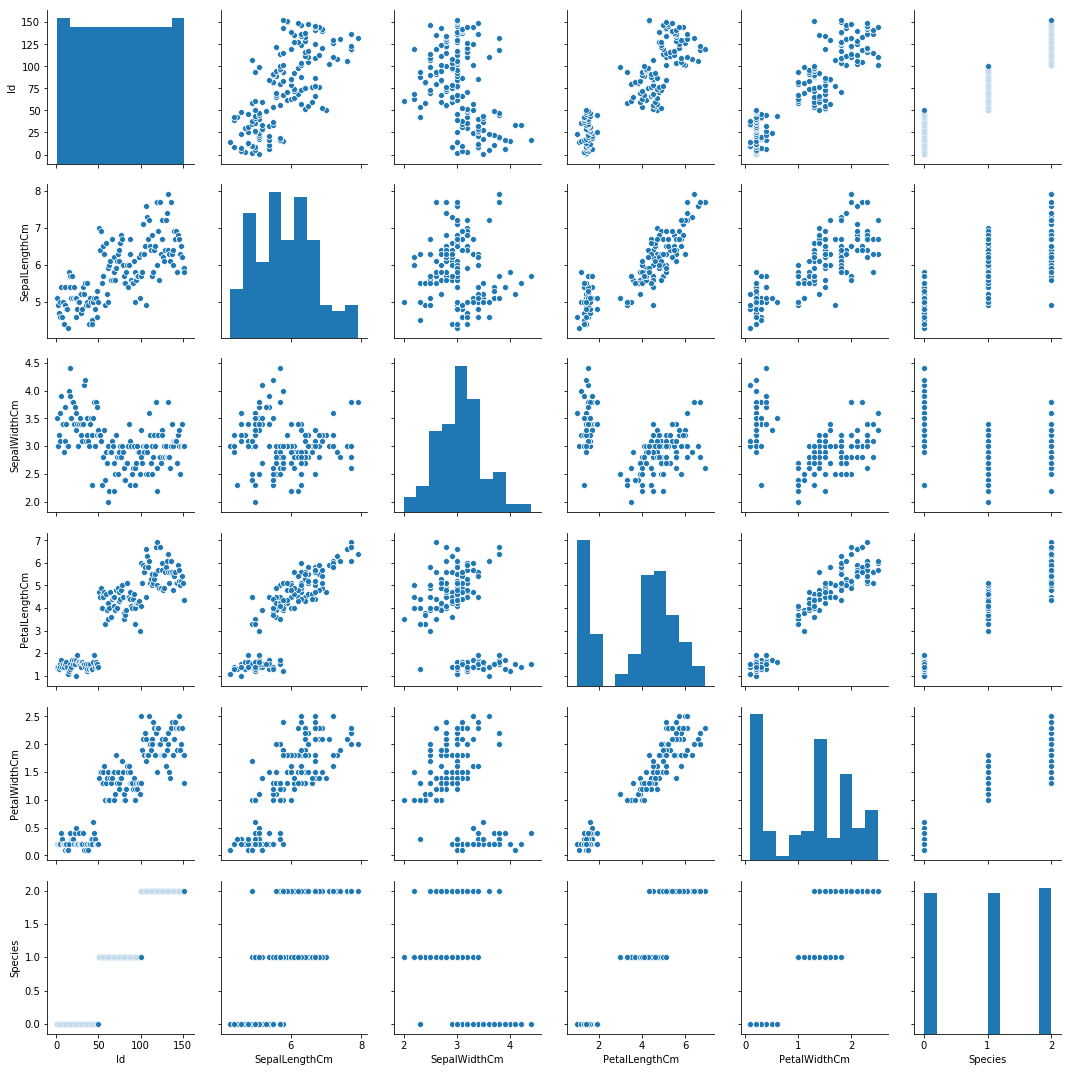

In [207]:
import seaborn as sns
sns.pairplot(iris_df_numeric)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
iris_feature_df = iris_df.drop(labels= ["Species","Id"] , axis = 1)
iris_label_df = iris_df['Species']
print(iris_feature_df.sample(5))
print(iris_label_df.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
137            6.4           3.1            5.5           1.8
148            6.2           3.4            5.4           2.3
95             5.7           3.0            4.2           1.2
125            7.2           3.2            6.0           1.8
65             6.7           3.1            4.4           1.4
3      0
146    2
125    2
31     0
136    2
Name: Species, dtype: int32


In [210]:
X = np.array(iris_feature_df)
X.shape

(152, 4)

In [211]:
y = np.array(iris_label_df)
y.shape

(152,)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [213]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 3)

In [214]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [215]:
predicted_labels = KNN.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,predicted_labels)

0.9354838709677419

In [216]:
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,predicted_labels)

0.9354838709677419

In [217]:
KNN = KNeighborsClassifier(n_neighbors= 9)
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,predicted_labels)

0.9354838709677419

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [218]:
MSE = []

In [219]:
from sklearn import metrics
neighbours_list = range(1,20,2)
for k in neighbours_list :
    print(k)
    KNN = KNeighborsClassifier(n_neighbors= k)
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    MSE.append(1 - metrics.accuracy_score(y_test,predicted_labels))

1
3
5
7
9
11
13
15
17
19


In [220]:
MSE

[0.06451612903225812,
 0.06451612903225812,
 0.06451612903225812,
 0.032258064516129004,
 0.06451612903225812,
 0.06451612903225812,
 0.06451612903225812,
 0.032258064516129004,
 0.06451612903225812,
 0.06451612903225812]

In [221]:
neighbours_list = list(neighbours_list)
neighbours_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [255]:
MSElist = []
min_indices = []
MSElist = MSE
for i in range(len(MSElist)) :
    if MSElist[i] == min(MSE) :
        min_indices.append(i)
min_indices

[3, 7]

In [262]:
print("Optimal k value(s) are:")
for i in range(len(neighbours_list)) :
    for j in min_indices :
        if i == j :
            print(neighbours_list[i])

Optimal k value(s) are:
7
15


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

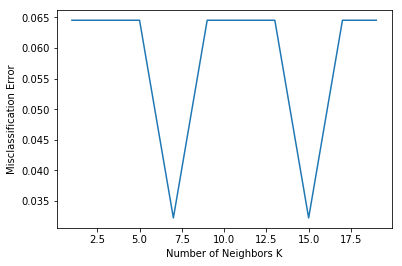

In [263]:
import matplotlib.pyplot as plt
plt.plot(neighbours_list,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Question 11: Read the data given in bc2.csv file

In [264]:
bc2_df = pd.read_csv('D:/CSVFiles/bc2.csv')
bc2_df

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Question 12: Observe the no.of records in dataset and type of each feature 

In [265]:
bc2_df.shape

(699, 11)

In [266]:
bc2_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

In [267]:
bc2_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Check Missing Values

In [268]:
bc2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [269]:
bc2_df['Bare Nuclei'] #has missing values as '?'

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
32      5
33      1
34      1
35      1
36      1
37      1
38     10
39      7
40      ?
41      3
42     10
43      1
44      1
45      1
46      9
47      1
48      1
49      8
50      3
51      4
52      5
53      8
54      8
55      5
56      6
57      1
58     10
59      2
60      3
61      2
62      8
63      2
64      1
65      2
66      1
67     10
68      9
69      1
70      1
71      2
72      1
73     10
74      4
75      2
76      1
77      1
78      3
79      1
80      1
81      1
82      1
83      2
84      9
85      4
86      8
87     10
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      6
99     10


### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [270]:
bc2_df.describe(include = 'all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [271]:
bc2_df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [272]:
bc2_df_mve = bc2_df.copy()
bc2_df_mve

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [273]:
bc2_df_mve['Bare Nuclei'] = bc2_df_mve['Bare Nuclei'].replace('?',np.nan)

In [274]:
bc2_df_mve[bc2_df_mve['Bare Nuclei'].isnull()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [275]:
bc2_df_mve['Bare Nuclei'] = number.fit_transform(bc2_df_mve['Bare Nuclei'].astype('float'))

In [276]:
bc2_df_mve['Bare Nuclei'].fillna(1, inplace = True)
#bc2_df_mve['Bare Nuclei'].fillna(bc2_df_mve['Bare Nuclei'].mode(), inplace = True)

In [277]:
for value in ["Bare Nuclei"]:
    print (value,":", sum(bc2_df_mve[value] == '?'))

Bare Nuclei : 0


In [278]:
bc2_df_mve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Question 15: Find the distribution of target variable (Class) 

In [279]:
bc2_df_mve["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

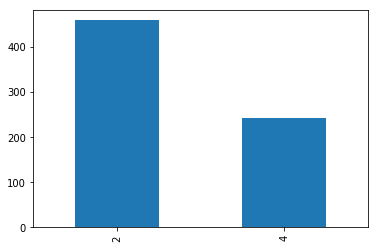

In [280]:
pd.value_counts(bc2_df_mve["Class"]).plot(kind="bar")

### convert the datatype of Bare Nuclei to `int`

In [281]:
bc2_df_mve['Bare Nuclei'] = number.fit_transform(bc2_df_mve['Bare Nuclei'].astype('int'))

In [282]:
bc2_df_mve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Question 16: Standardization of Data

In [283]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(bc2_df_mve))
X_std.columns = bc2_df_mve.columns

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [284]:
%matplotlib inline

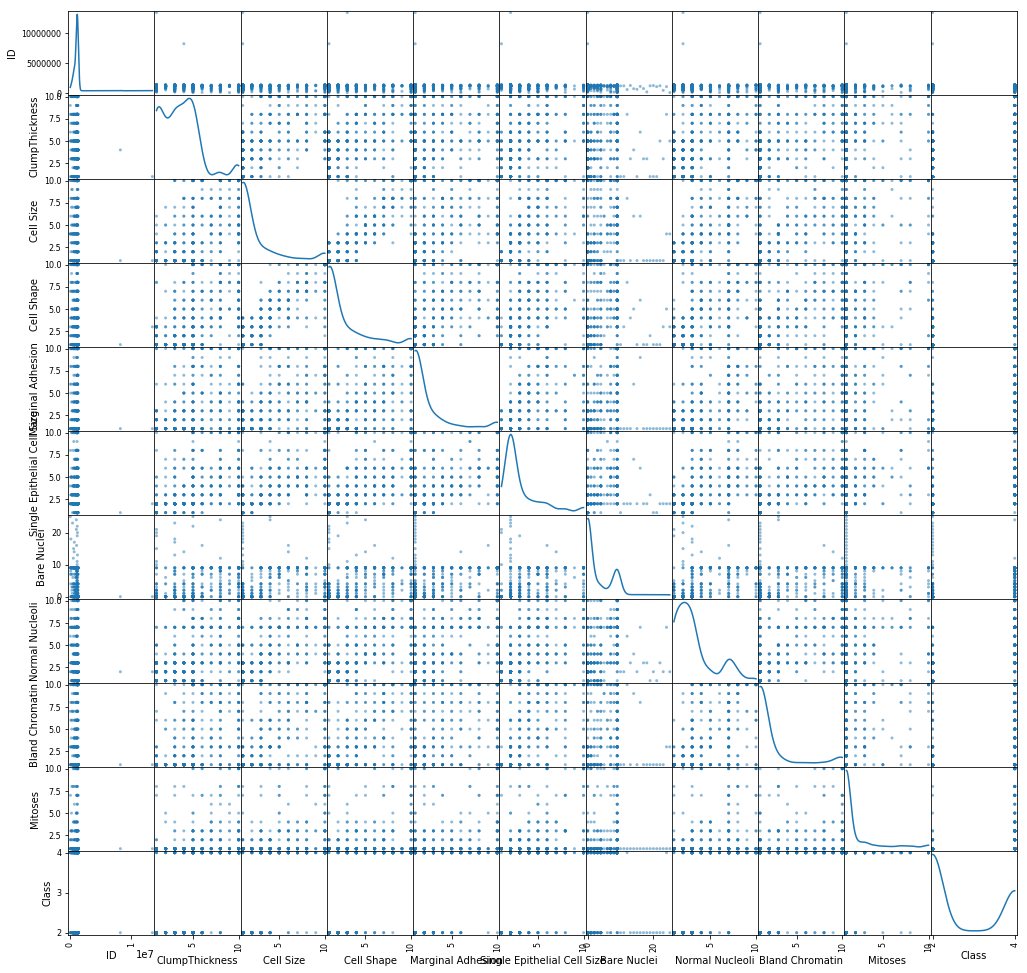

In [285]:
spd = pd.plotting.scatter_matrix(bc2_df_mve,figsize=(17,17),diagonal="kde")

### Question 18: Divide the dataset into feature set and target set

In [286]:
from sklearn.model_selection import train_test_split
bc2_feature_df = bc2_df_mve.drop(labels= ["Class","ID"] , axis = 1)
bc2_target_df = bc2_df_mve['Class']
bc2_feature_df.sample(5)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
56,8,10,10,1,3,5,3,9,1
208,1,1,1,1,1,0,3,1,1
227,8,9,9,5,3,4,7,7,1
265,5,1,4,1,2,0,3,2,1
74,10,6,4,1,3,3,3,2,3


In [287]:
bc2_target_df.sample(5)

410    2
423    2
521    2
190    4
475    2
Name: Class, dtype: int64

### Divide the Training and Test sets in 70:30 

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

## Question 19 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [289]:
MSE = []

In [290]:
from sklearn import metrics
neighbours_list = range(1,20,2)
for k in neighbours_list :
    print(k)
    KNN = KNeighborsClassifier(n_neighbors= k)
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    MSE.append(1 - metrics.accuracy_score(y_test,predicted_labels))

1
3
5
7
9
11
13
15
17
19


In [291]:
MSE

[0.04347826086956519,
 0.04347826086956519,
 0.04347826086956519,
 0.04347826086956519,
 0.021739130434782594,
 0.04347826086956519,
 0.021739130434782594,
 0.04347826086956519,
 0.021739130434782594,
 0.021739130434782594]

### Question 20: Print the optimal number of neighbors

In [292]:
neighbours_list = list(neighbours_list)

In [293]:
MSElist = []
min_indices = []
MSElist = MSE
for i in range(len(MSElist)) :
    if MSElist[i] == min(MSE) :
        min_indices.append(i)
min_indices

[4, 6, 8, 9]

In [294]:
print("Optimal k value(s) are:")
for i in range(len(neighbours_list)) :
    for j in min_indices :
        if i == j :
            print(neighbours_list[i])

Optimal k value(s) are:
9
13
17
19
